In [1]:
# Импорт библиотек
import math
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
%matplotlib inline

## t-тест двух независимых выборок

In [2]:
# Создаем данные
x1 = np.random.normal(0, 1.5, 100)
y1 = np.random.normal(0, 1.5, 100)

### Проверка на нормальность данных

In [3]:
# Тест Шапиро-Уилка
stat, p = stats.shapiro(x1)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.986, p-value=0.360
Принять гипотезу о нормальности


###  Проверка гипотезы

In [4]:
# H0 - между выборками нет статистически значимых различий
# H1 - между выборками есть статистически значимые различия
stats.ttest_ind(x1, y1)

Ttest_indResult(statistic=1.0650237860725407, pvalue=0.28816219487706335)

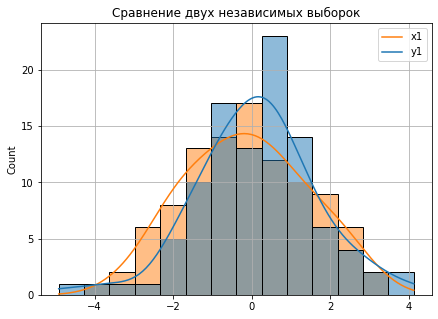

In [5]:
plt.figure(figsize=(7, 5))
df1 = pd.DataFrame({'x1':x1,'y2':y1})
sns.histplot(data=df1, kde=True)
plt.title('Сравнение двух независимых выборок')
plt.legend(['x1', 'y1'])
plt.grid()

## t-тест двух зависимых выборок

In [6]:
# Создаем данные
x2 = np.random.normal(0, 1.5, 100)
y2 = np.random.normal(1, 1.5, 100)

### Проверка на нормальность данных

In [7]:
# Критерий Пирсона
stat, p = stats.normaltest(x2)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=2.337, p-value=0.311
Принять гипотезу о нормальности


### Проверка гипотезы

In [8]:
# H0 - между выборками нет статистически значимых различий
# H1 - между выборками есть статистически значимые различия
stats.ttest_rel(x2, y2)

Ttest_relResult(statistic=-5.621381317550921, pvalue=1.7512381494134119e-07)

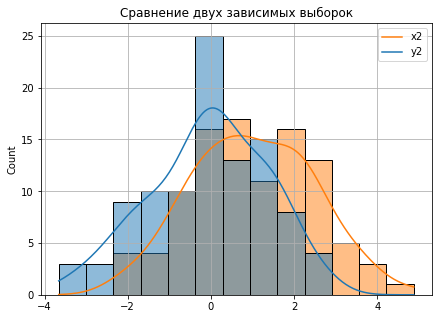

In [9]:
plt.figure(figsize=(7, 5))
df2 = pd.DataFrame({'x2':x2,'y2':y2})
sns.histplot(data=df2, kde=True)
plt.title('Сравнение двух зависимых выборок')
plt.legend(['x2', 'y2'])
plt.grid()

##Тест, отличается ли среднее выборки от N

In [10]:
N=3
stats.ttest_1samp(x2, N)

Ttest_1sampResult(statistic=-21.871740482188972, pvalue=1.0835048400816429e-39)

## U-критерий Манна — Уитни

In [11]:
#  Статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, 
# измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

In [12]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A + stats.norm.rvs(scale=54,loc=11,size=100)

In [13]:
# H0 - различий нет
# H1 - различия есть
stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет')
else:
    print('Различия в эффекте есть')

Statistics=4343.000, p=0.054
Различий в эффекте нет


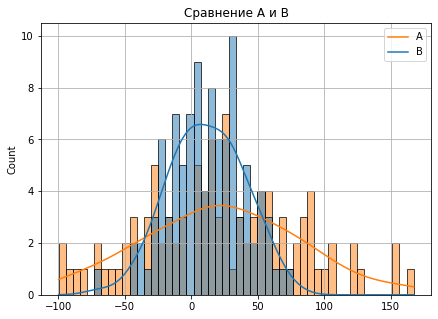

In [14]:
plt.figure(figsize=(7, 5))
df = pd.DataFrame({'A':A, 'B':B})
sns.histplot(data=df, kde=True, bins=50)
plt.title('Сравнение A и B')
plt.legend(['A', 'B'])
plt.grid()

## Т-критерий Вилкоксона

In [15]:
# Также используются названия Т-критерий Уилкоксона, критерий Вилкоксона, критерий знаковых рангов Уилкоксона, критерий суммы рангов Уилкоксона.
# Непараметрический статистический тест (критерий), используемый для проверки различий между двумя выборками парных или независимых измерений по уровню
# какого-либо количественного признака, измеренного в непрерывной или в порядковой шкале. Впервые предложен Фрэнком Уилкоксоном. 
# Другие названия — W-критерий Вилкоксона, критерий знаковых рангов Вилкоксона, критерий Уилкоксона для связных выборок. 
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни.

In [16]:
np.random.seed(11)
C = stats.norm.rvs(scale=30,loc=11,size=100)
D = C + stats.norm.rvs(scale=54,loc=11,size=100)

In [17]:
# H0 - различий нет
# H1 - различия есть
stat, p = wilcoxon(C,D)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет')
else:
    print('Различия в эффекте есть')

Statistics=1930.000, p=0.041
Различия в эффекте есть


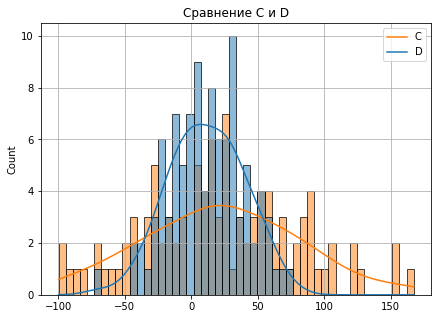

In [18]:
plt.figure(figsize=(7, 5))
df = pd.DataFrame({'C':C, 'D':D})
sns.histplot(data=df, kde=True, bins=50)
plt.title('Сравнение C и D')
plt.legend(['C', 'D'])
plt.grid()

## ANOVA (дисперсионный анализ)

In [19]:
H = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
I= [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
J = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

In [20]:
# H0 - различий нет
# H1 - различия есть
F, p = f_oneway(H, I,J)
print('F=%.3f, p=%.5f' % (F, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет')
else:
    print('Различия в эффекте есть')

F=12.526, p=0.00003
Различия в эффекте есть


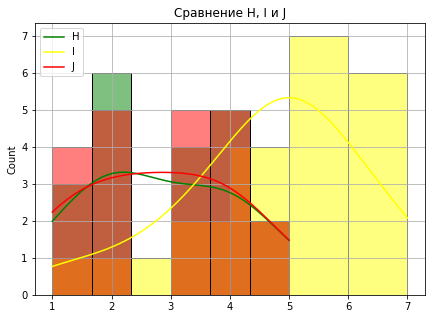

In [21]:
plt.figure(figsize=(7, 5))
sns.histplot(H, kde=True, color='green')
sns.histplot(I, kde=True, color='yellow')
sns.histplot(J, kde=True, color='red')
plt.title('Сравнение H, I и J')
plt.legend(['H', 'I', 'J'])
plt.grid()

##Тест Fisher_Exact

In [22]:
df3 = pd.DataFrame([[10,15],[39,34]], index=['Рост','Снижение'], columns=['Прогноз','Факт'])
print(df3)

          Прогноз  Факт
Рост           10    15
Снижение       39    34


In [23]:
# H0 - эффект случайный
# H1 - эффект не случайный
oddsratio, pvalue = sp.stats.fisher_exact(df3)
print(pvalue)

0.35417955365927367


##Проверка принадлежности одной выборки другой

In [24]:
# Создаем данные
x4= [4, 5, 8, 9, 6, 7, 5, 6, 7, 8, 5, 6, 7, 0, 9, 8, 4, 6, 7, 9, 8, 6, 5, 7, 8, 9, 6, 7, 5, 8, 6, 7, 9, 5, 10]

y4 = [8, 5, 6, 7, 0, 1, 8, 4, 6, 7, 0, 2, 6, 5, 7, 5, 3, 5, 3, 5, 3, 5, 5, 8, 7, 
          6, 4, 5, 3, 5, 4, 6, 4, 5, 3, 2, 6, 4, 2, 6, 1, 0, 4, 3, 5, 4, 3, 4, 5, 4, 
          3, 4, 5, 4, 3, 4, 5, 3, 4, 4, 1, 2, 4, 3, 1, 2, 4, 3, 2, 1, 5, 3, 4, 6, 4, 
          5, 3, 2, 4, 5, 6, 4, 3, 1, 3, 5, 3, 4, 4, 4, 2, 5, 3]

In [25]:
# H0 - не принадлежит
# H1 - принадлежит

def mean_confidence_interval(data, confidence=0.90):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence) / 2, n)
    return m - h, m, m + h

print(mean_confidence_interval(x4, confidence=0.95))
print(mean_confidence_interval(y4, confidence=0.95))

(5.96231523540854, 6.628571428571429, 7.294827621734318)
(3.601578660531681, 3.967741935483871, 4.333905210436061)


In [26]:
stats.ttest_ind(x4 ,y4)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

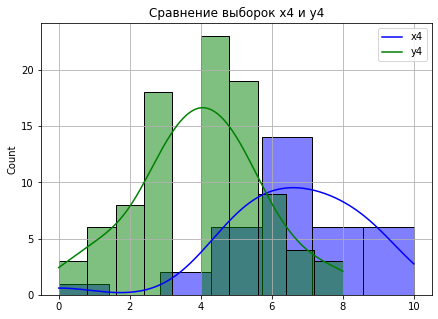

In [27]:
plt.figure(figsize=(7, 5))
sns.histplot(x4, kde=True, color='blue')
sns.histplot(y4, kde=True, color='green')
plt.title('Сравнение выборок x4 и y4')
plt.legend(['x4', 'y4'])
plt.grid()

##Z-оценка

In [28]:
list_number = [7,8,8,7.5,9]

In [29]:
# Рассчитываем среднее
mean = np.mean(list_number)
print(mean)

7.9


In [30]:
# Рассчитываем дисперсию
var = np.var(list_number,ddof=1)
print(var)

0.55


In [31]:
# Рассчитываем стандартное отклонение
std = round(np.std(list_number,ddof=1),2)
print(std)

0.74


In [32]:
# Рассчитаем z-оценку для 7.5
z = (7.5-mean)/std
print(z)

-0.540540540540541


In [33]:
# Такая Z-оценка означает, что число 7,5 удалено на -0,54 стандартных отклонений от среднего значения выборки.
# Z-оценка может быть как положительной, так и отрицательной.
# Отрицательная Z-оценка указывает на то, что выбранное число выборки меньше среднего значения, 
# а положительная Z-оценка – на то, что число больше среднего значения.